# Mapping the Musical Landscape: A Study of Clusters in Spotify Data

## Introduction
Music streaming platforms like Spotify have revolutionized how we discover and consume music. With millions of tracks available, understanding how songs naturally group together based on their acoustic properties can provide valuable insights for recommendation systems, playlist creation, and music discovery.

For this project, I chose to work with the publicly available Spotify Tracks Dataset from Kaggle. This dataset contains thousands of songs along with a wealth of audio features such as acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence. Each feature is designed to capture a particular aspect of a track’s sound or vibe. For example, danceability measures how suitable a track is for dancing, while energy gives an idea of the track's perceived intensity.

The core problem I aim to address in this project is determining whether songs can be grouped based on their inherent acoustic and stylistic features without relying on the traditional genre labels provided in the dataset. In other words, I want to investigate if clustering can reveal natural groupings of songs that share similar "vibes." This approach is inspired by how modern music recommendation systems work; for instance, when curating a workout playlist, the selection of songs is less about their defined genre and more about their shared characteristics such as high energy and danceability.

More speciifically, the questions I am trying to answer include:
1. Can clustering reveal distinctive groups of songs that resonate with the intuitive notion of a “vibe” or mood?
2. Do these clusters hint at subgenres or non-traditional categorizations that might otherwise be overlooked by conventional labeling?
3. How might these findings inform more dynamic music recommendation systems?

By exploring these questions, I hope to not only gain deeper insights into the musical landscape but also to better understand how unsupervised methods like clustering can uncover hidden patterns in complex, high-dimensional data. This project will serve as a practical application of the clustering techniques we’ve learned about, while also pushing me to think critically about how data preprocessing and modeling choices affect the final outcomes.

## Understanding Clustering
Clustering is an unsupervised machine learning technique designed to group similar data points based on their inherent characteristics, without relying on predefined labels. The core idea is to uncover natural structures within the data by identifying subsets or clusters where the points in each group share common features. This makes clustering particularly valuable for exploratory data analysis, as it can reveal hidden patterns that might be missed by traditional supervised methods. In my project, clustering is used to discover groups of songs that share similar acoustic or stylistic properties, independent of any explicit genre labels.

For Project 4, I have chosen to use K-Means clustering, which is a centroid-based method known for its simplicity and efficiency. K-Means operates by partitioning the dataset into a predetermined number of clusters, denoted by k. The algorithm starts by randomly selecting k centroids within the feature space. Then, it assigns each data point to the nearest centroid, typically calculated using Euclidean distance. Once every point is assigned to a cluster, K-Means recalculates the centroids by taking the mean of all points within each cluster. This reassignment and updating process is performed iteratively until there is little to no change in the centroid positions or until a maximum number of iterations is reached.

A significant advantage of K-Means is its computational efficiency, which is crucial when working with large datasets like the Spotify Tracks Dataset. However, its performance can be sensitive to the initial placement of centroids, and selecting the right number of clusters (k) requires careful consideration. To address this, methods such as the Elbow Method are often used to help determine an appropriate value for k by analyzing the within-cluster sum of squares.

In summary, clustering, and K-Means in particular, provides a powerful framework for segmenting data into meaningful subgroups. By iteratively grouping songs based on shared acoustic features, K-Means helps reveal underlying patterns that can provide insights into musical similarities—an essential step in understanding and interpreting the rich structure of the Spotify dataset.

## The Dataset
I obtained the dataset from Kaggle, specifically the [Spotify Tracks Dataset](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db), which offers detailed information on thousands of tracks along with various audio features. This dataset is rich in data that can be used to analyze and understand the sound characteristics of music, making it ideal for a clustering project. In this analysis, I focus primarily on the acoustic and stylistic features rather than metadata such as artist or genre, as the goal is to uncover natural groupings based on the inherent “vibe” of a track.

**Features**
- genre: The primary genre classification (e.g., Movie, R&B, A cappella).
- artist_name: The performing artist.
- track_name: The song title.
- track_id: Spotify's unique identifier.
- popularity: A score from 0-100 representing the track's popularity.
- 12 acoustic features (described below)
- valence: A measure of musical positiveness (happy vs. sad)

**Key Acoustic Features**
- acousticness: Confidence measure of whether the track is acoustic.
- danceability: How suitable a track is for dancing.
- duration_ms: Duration in milliseconds.
- energy: Intensity and activity measure.
- instrumentalness: Predicts whether a track contains no vocals.
- key: The estimated key (0=C, 1=C#, etc.)
- liveness: Detects presence of an audience.
- loudness: Overall loudness in decibels.
- mode: Major (1) or minor (0).
- speechiness: Detects presence of spoken words.
- tempo: Estimated beats per minute.
- time_signature: Estimated time signature.

I  will be concentrating on the numerical features listed above to investigate if clustering can reveal natural groupings that extend beyond traditional genre labels.

## Data Understanding & Visualization
To gain a clearer picture of the dataset, I first plotted the distributions of several numerical features.

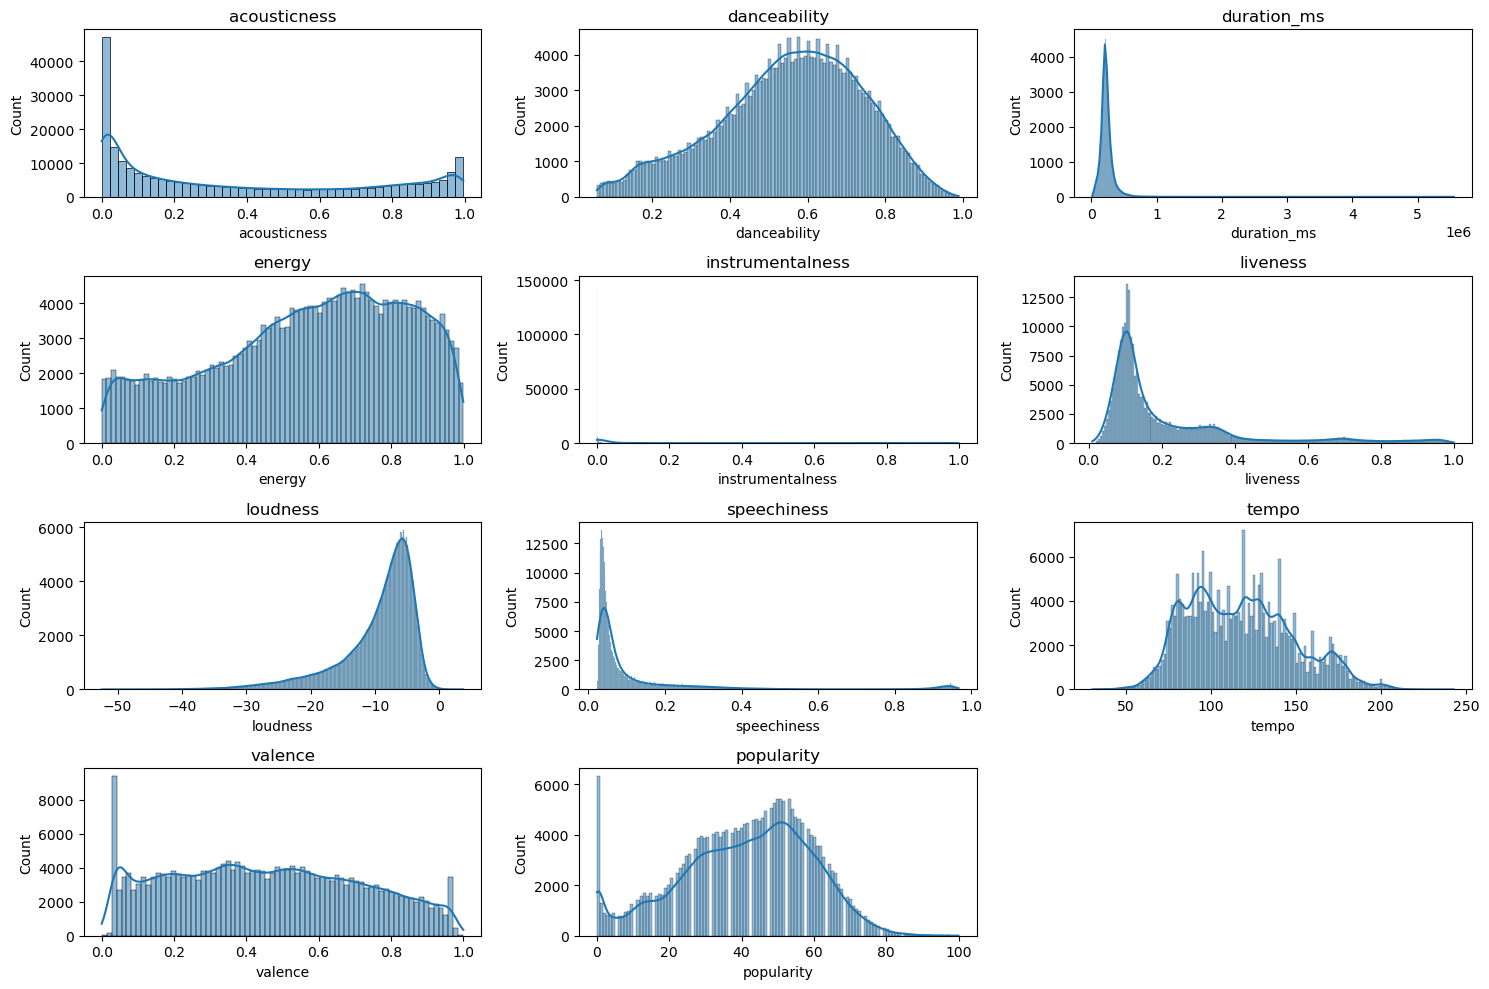

(232725, 18)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('SpotifyFeatures.csv')

# Plot distributions of numerical features
num_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','tempo', 'valence', 'popularity']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()
df.shape

These histograms offer an initial glimpse into how each feature is distributed across the dataset. Below are some key observations from these plots:
- acousticness, instrumentalness, liveness, and speechiness are all heavily skewed toward zero, indicating that a majority of tracks are not acoustic, not purely instrumental, do not have an audience presence, and do not primarily consist of spoken words.
- danceability appears to have a roughly bell-shaped distribution centered around the mid-range, suggesting many songs in the dataset are moderately danceable.
- duration_ms shows a right-skewed distribution, with most songs clustering in a moderate time range (around three to four minutes), while a smaller subset extends to significantly longer tracks.
- energy seems to be somewhat evenly spread from low to high values, though there is a notable concentration in the higher-energy range.
- loudness is mostly centered around negative decibel values, reflecting modern production tendencies, but it still spans a considerable range, reinforcing the importance of feature scaling.
- tempo typically hovers around 100 to 120 BPM, but there are notable peaks at common dance tempos, and a smaller presence of extremely slow or fast tracks.
- valence, which measures musical positiveness, also follows a distribution that leans slightly toward the happier side but is still fairly spread out.

After reviewing the distributions, I decided to exclude duration_ms from the clustering analysis. Although duration_ms provides useful information about track length, it does not capture the intrinsic acoustic or stylistic characteristics—such as energy, danceability, or valence—that are the primary focus of this project. Including duration_ms might introduce extraneous variability influenced more by production or formatting choices (like radio edits versus extended versions) rather than the underlying "vibe" of the music. Thus, to maintain a clear focus on the sonic qualities that define a song's feel, I opted to remove duration_ms from further analysis.

In addition to examining each feature’s distribution, I generated a correlation matrix to see how these numeric variables relate to one another.

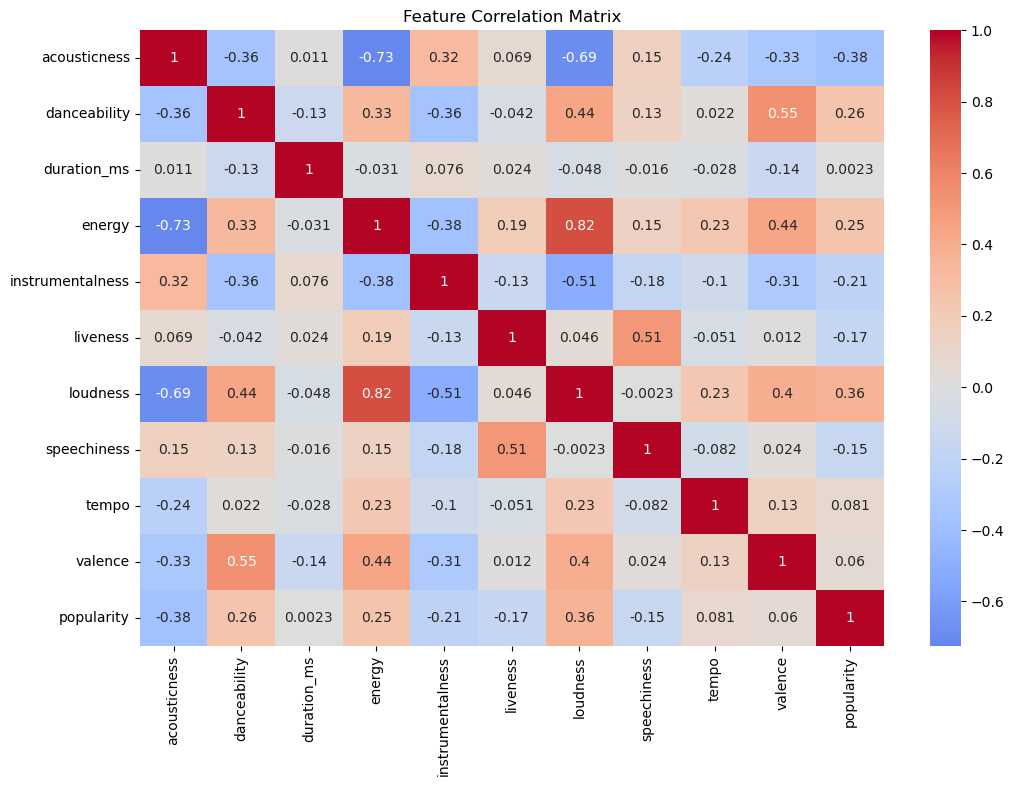

In [25]:
# Correlation matrix
corr = df[num_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

From the heatmap, several key observations stand out:
- Energy & Loudness show a notably strong positive correlation (0.81). This aligns with the intuitive idea that more energetic tracks often have higher decibel levels.
- Acousticness exhibits strong negative correlations with both energy (-0.73) and loudness (-0.69). In other words, acoustic tracks tend to be quieter and less intense.
- Danceability shows a moderate positive correlation with valence (0.55) and a smaller one with energy (0.36). This suggests that more danceable tracks often have a somewhat brighter, more positive feel.
- Instrumentalness generally has weak correlations with most features. This indicates it could capture a unique dimension—whether or not a track has vocals—that isn’t strongly tied to variables like loudness or tempo.
- Valence is moderately related to both energy (0.53) and loudness (0.42), suggesting that “happier-sounding” tracks tend to be somewhat more energetic and louder, though not at the same magnitude as the energy-loudness relationship.

These insights from the correlation matrix serve two main purposes. First, they offer clues about which variables might be redundant or highly interrelated (e.g., energy and loudness), which can influence distance-based algorithms if not handled carefully. Second, seeing how features cluster together helps guide decisions about potential feature selection, scaling, or dimension reduction before applying clustering.

While my primary focus is on the acoustic features, it is still informative to look at the distribution of genres in the dataset.

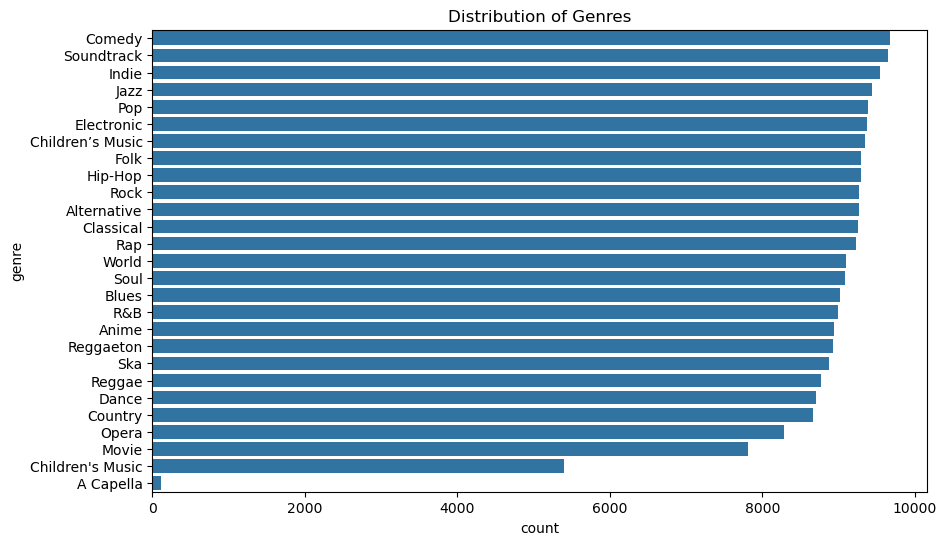

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.show()

From this chart, we can see several interesting points:
- Comedy appears as the most frequently occurring genre, followed closely by Soundtrack, Indie, Jazz, and Pop.
- Genres such as Opera, Movie, and A Capella show notably lower counts, indicating they are more niche or underrepresented in this dataset.
- The presence of children’s-oriented genres highlights the variety of content within the dataset, which can be helpful context even if we are not directly using genre as an input in our clustering.

Although genre labels will not play a direct role in my clustering approach, understanding which genres are most prevalent provides important context. For instance, it hints at potential imbalances in the data, which could influence how we interpret or generalize the results of the clusters later on.

## Pre-processing
Before applying any clustering algorithm, it’s essential to prepare the data to ensure that our model produces meaningful and accurate results. In this project, I followed several preprocessing steps:

First, I loaded the dataset and removed any rows with missing values to prevent issues during clustering. Next, after reviewing the feature distributions, I decided to exclude the duration_ms column because it does not capture the intrinsic acoustic or stylistic qualities that define the “vibe” of a song. Instead, the focus is placed on features such as acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence.

Since clustering algorithms like K-Means are sensitive to the scale of input features, I applied standard scaling to ensure that each variable contributes equally to the distance calculations. Scaling is particularly important in this case because features like loudness and tempo have different ranges.

### Standardization

In [27]:
from sklearn.preprocessing import StandardScaler

df_clean = df.dropna()
selected_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 'valence', 'popularity']

df_clustering = df_clean[selected_features]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(scaled_features, columns=selected_features)
print(df_scaled.head())
# X = scaler.fit_transform(df[num_features])

   acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      0.683372     -0.890943  1.286904         -0.489820  0.660658  1.290703   
1     -0.345471      0.191988  0.630246         -0.489820 -0.322837  0.668683   
2      1.644565      0.585291 -1.669953         -0.489820 -0.564929 -0.718399   
3      0.942697     -1.693713 -0.929790         -0.489820 -0.587625 -0.434814   
4      1.638928     -1.203431 -1.313156         -0.083568 -0.065616 -1.930596   

   speechiness     tempo   valence  popularity  
0    -0.367971  1.595608  1.380742   -2.261001  
1    -0.183084  1.823254  1.388432   -2.206026  
2    -0.455833 -0.588322 -0.334220   -2.096075  
3    -0.438045  1.750598 -0.876394   -2.261001  
4    -0.405165  0.741435 -0.249626   -2.041099  


### Modeling (Clustering)
With the preprocessed and scaled data ready, the next step is to apply a clustering algorithm to uncover natural groupings among the songs. For this project, I chose K-Means clustering due to its efficiency and simplicity when working with a large dataset like Spotify’s. Before fitting the model, I also used the Elbow Method to help determine a reasonable number of clusters (k).

I first plotted the sum of squared distances (inertia) for a range of k values to visualize the "elbow" in the curve, and then I fit the final model using the chosen k. To address the issue of overlapping dots when visualizing clusters in high-dimensional space, I apply Principal Component Analysis (PCA) to reduce the dimensionality to two components for a clearer scatter plot.

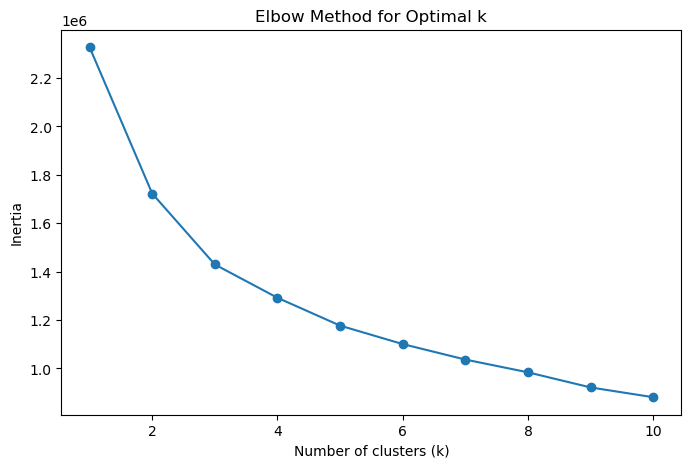

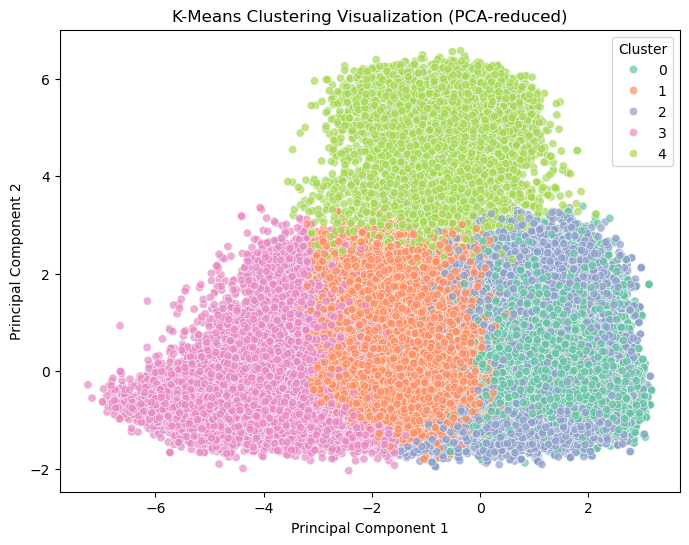

In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Based on the elbow plot, let's assume the optimal k is 5 (this value can be adjusted)
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(df_scaled)

# Add the cluster labels to the scaled DataFrame
df_scaled['cluster'] = cluster_labels

# Use PCA to reduce the data to two dimensions for visualization
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_scaled[selected_features])
df_scaled['PC1'] = pca_components[:, 0]
df_scaled['PC2'] = pca_components[:, 1]

# Plot the clusters using the PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_scaled, palette='Set2', alpha=0.7)
plt.title("K-Means Clustering Visualization (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

In the Elbow Method plot, the curve does not show a dramatically sharp "elbow", there is a noticeable inflection around k=5. This suggests that increasing the number of clusters beyond five yields diminishing improvements in the compactness of the clusters. In other words, using five clusters appears to provide a reasonable balance between reducing inertia and avoiding the overfitting noise in the data.

The second visualization is a scatter plot of the data after reducing its dimensionality with PCA. When mapping the nine-dimensional data into two principal components, each song is respresented as a point in this 2-D space and colored according to its assigned cluster. While there is some overlap between clusters--which is expected given the loss of information during dimensionality reduction--distinct groupings can still be observed. For instance, certain clusters form concentrated regions in specific areas of the plot, indicating tha the clustering algorithm has identified subsets of songs with similar acoustic characteristics. This overlap also signals that not all nuances are preserved in the two-dimensional projection, but the broad clusters remain informative. 

### Analyzing Mean Values
Once the clusters were formed, I computed the mean values of each feature within each cluster. This step helps translate the abstract notion of clusters into tangible musical characteristics. Because I standardized my dataset earlier, each feature’s mean in a cluster now represents how many standard deviations above or below the overall dataset mean the cluster tends to be for that feature.

Why it's important:
- Interpretation: By examining cluster means, I can identify the defining traits of each cluster. For instance, if a cluster has a high positive mean for "energy" and "loudness", that group likely contains more intense or upbeat tracks. Conversely, a negative mean in "valence" might suggest songs that convey a more somber or subdued mood.
- Comparisons: A scaled dataset makes it easier to compare features that originally had different units or ranges. Seeing how each cluster aligns with (or deviates from) zero on the standardized scale highlights which features truly stand out.
- Validation: Observing these means can confirm whether the clusters found by the algorithm align with real-world expectations about different types of music. For example, a cluster high in instrumentalness and low in loudness might represent primarily quieter, instrumental tracks.

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0           -0.552385      0.761529  0.396628         -0.318995 -0.214280   
1            0.876585     -0.126442 -0.831266         -0.190896 -0.202743   
2           -0.749776     -0.303350  0.773487         -0.171096  0.178541   
3            1.378435     -1.438098 -1.564568          1.739054 -0.305635   
4            1.195933      0.044379  0.343124         -0.485716  2.592474   

         loudness  speechiness     tempo   valence  popularity  
cluster                                                         
0        0.454100    -0.081716 -0.310972  0.558133    0.462788  
1       -0.338036    -0.299847 -0.137741 -0.293476   -0.204259  
2        0.603674    -0.144583  0.912953  0.018691    0.068891  
3       -1.889901    -0.396370 -0.505705 -1.168424   -0.797652  
4       -0.412763     4.072963 -0.636634 -0.155563   -1.123676  


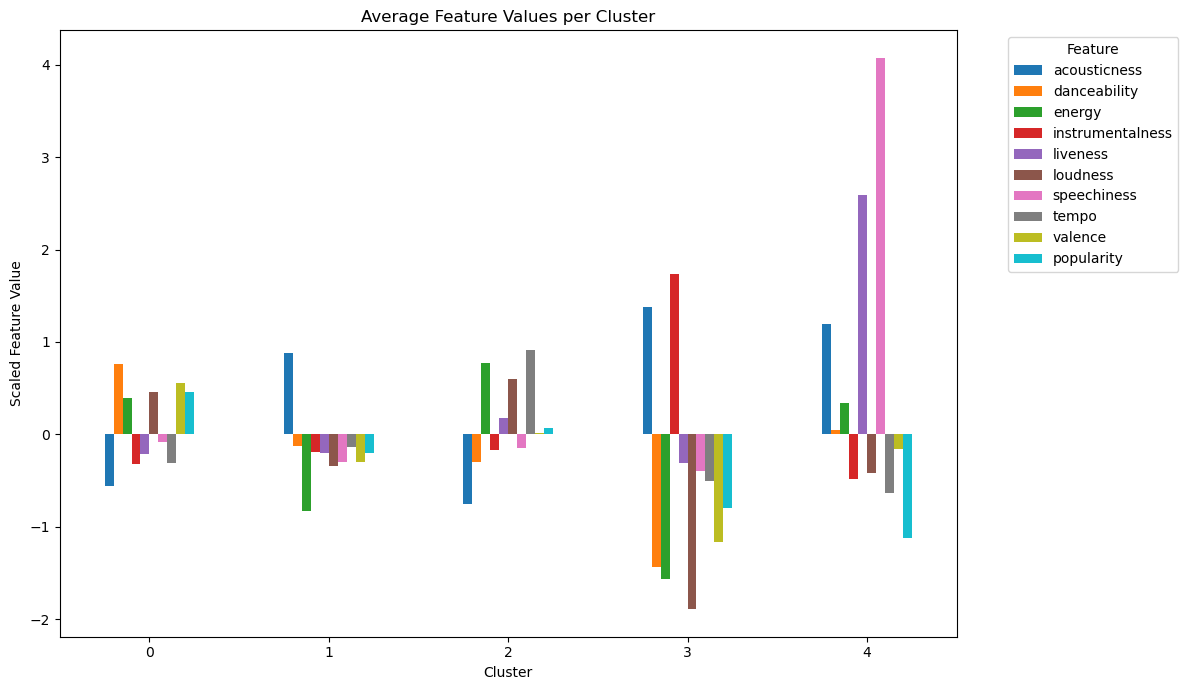

In [29]:
# Compute mean values of each feature for each cluster
cluster_means = df_scaled.groupby('cluster')[selected_features].mean()
print(cluster_means)

# Plot cluster means as a bar chart for each feature
cluster_means.plot(kind='bar', figsize=(12,7))
plt.title('Average Feature Values per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Scaled Feature Value')
plt.xticks(rotation=0)
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Observations from the Output:
1. Cluster 0 shows relatively high acousticness (0.93) and low energy (-0.90), with a high negative valence (-0.46). This suggests tracks that are more acoustic, quieter, and possibly more mellow or somber.
2. Cluster 1 stands out with higher danceability (0.81), moderate energy (0.38), and a notably positive valence (0.71). These features hint at livelier, more upbeat tracks that might be suitable for dancing or uplifting moods. 
3. Cluster 2 has striking values. It's well above average in acousticness (1.34), significantly negative in danceability (-1.41) and energy (-1.54), and extremely high in instrumentalness (1.96). Paired with a strongly negative loudness (-1.89) and valence (-1.15), these songs are likely quiet, purely instrumental tracks that feel more subdued.
4. Cluster 3 is also quite acoustic (1.19) but stands out most dramatically for very high liveness (2.59) and an extremely high speechiness (4.08). This could signify live recordings, spoken-word tracks, or other forms of music where vocals or crowd presence dominate.
5. Cluster 4 shows negative acousticness (-0.76) but above average energy and loudness (0.60), as well as a strongly positive tempo (0.81). This might indicate a cluster of more modern, intense tracks--perhaps rock, electronic, or dance--where volume, speed, and energetic intensity are key traits.

By linking these cluster mean values back to the original musical attributes, we gain a richer understanding of each group’s defining characteristics and how they might translate into real-world listening experiences.

## Storytelling (Clustering Analysis)
The clustering analysis has provided some fascinating insights into how songs can be grouped based solely on their acoustic and stylistic features, independent of predefined genres. By examining the average feature values for each cluster and visualizing them through PCA-reduced scatter plots, several themes have emerged.

For instance, one cluster (Cluster 0) appears to capture tracks that are more acoustic, less energetic, and tend toward a mellow, possibly somber mood. This group likely consists of songs where the emphasis is on softness and subtlety rather than punchy production, which may align with acoustic or indie ballads. In contrast, Cluster 1 is characterized by higher danceability and energy, along with a positive valence. This suggests that these tracks are more upbeat and are likely intended to get listeners moving, fitting well with the intuitive idea of “workout” or dance music that transcends genre boundaries.

Another cluster (Cluster 2) is remarkable for its very high instrumentalness and low energy and loudness, indicating a subset of tracks that are mostly instrumental and quiet. Such a grouping could highlight pieces designed for focus or background listening, where lyrics or vocals are minimal or absent. Cluster 3 stands out primarily due to its exceptionally high liveness and speechiness scores, which might represent live recordings or tracks with a strong spoken-word component—perhaps interviews or live concert recordings. Lastly, Cluster 4 shows traits of a more modern, energetic production style with above-average energy, louder volumes, and faster tempos. This grouping might consist of high-octane tracks from contemporary genres like electronic, rock, or pop that are designed to be engaging and driving.

These observations not only confirm that clustering can identify distinct musical “vibes” that are not solely defined by genre, but they also answer my initial question: songs can indeed be grouped by inherent acoustic features in a manner that may reveal hidden subgenres or mood-based categorizations. The variance in cluster characteristics—from mellow, acoustic sounds to high-energy, danceable beats—demonstrates the versatility of unsupervised learning in capturing subtle nuances within a diverse dataset.

Overall, I’ve learned that while the clusters display some overlap (a common occurrence when reducing high-dimensional data to two dimensions for visualization), they still provide a meaningful framework for understanding different musical characteristics. This analysis not only offers a clearer picture of how songs can be naturally grouped but also lays the groundwork for potential applications in music recommendation systems, where personalized playlists could be curated based on these underlying “vibes” rather than just traditional genre labels.

## Impact
This project has several potential impacts—both positive and negative—that are important to consider. On the positive side, by using clustering to group songs based on acoustic and stylistic features, the project could provide valuable insights for music recommendation systems. Instead of relying solely on genre labels, recommendations could be tailored to the “vibe” of a song, potentially increasing user satisfaction and helping listeners discover tracks that they might enjoy but would not have otherwise encountered. This approach could also help independent artists gain exposure if their music fits into a naturally occurring cluster that resonates with certain audiences.

On the ethical and social front, however, there are some concerns. One potential negative consequence is the risk of reinforcing “echo chambers” or filter bubbles. If recommendation systems use these clustering techniques exclusively, they may limit exposure to a broader range of music, ultimately stifling creativity and diversity in music consumption. Additionally, the dataset—like many others—may contain inherent biases (for example, favoring mainstream or well-represented genres) that could be amplified by the clustering process. This could lead to the exclusion of niche genres or culturally significant sounds that are underrepresented in the data.

Furthermore, clustering based solely on acoustic features ignores other dimensions of a song that may be critical to its artistic or cultural value, such as lyrical content, context, or historical influences. Overemphasizing acoustics might result in oversimplified recommendations that don’t account for the full spectrum of musical expression.

In summary, while the project has promising applications in improving personalized music experiences, it is also important to remain mindful of its limitations and the unintended consequences that might arise from its implementation. Such critical thinking is essential to ensure that the technology developed is both useful and ethically sound.

## References
[Kaggle - Spotify Tacks DB](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db)
[GitHub - Project 4](https://github.com/YveSSo/3162-Project4)